# Laboratorio 8 


**Pancakes** **Problem**

In [1]:
import pydot
import itertools
from collections import defaultdict 
from IPython.display import Image, display

In [2]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [3]:
def pancakestree(s):  #función completa (con parte gráfica de pancakest trees)
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        Pn=0
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    Pn=l+1
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True 
              
        #Display the pydot graph G
        im = Image(G.create_png())
        display(im)
        return (Pn)

Función que generará todas las permutaciones posibles de los pancakes Excepto la lista ordenada $n!$

In [4]:
def permutacion(pancakes):
  permutaciones= pancakes.copy()
  return (list(itertools.permutations(permutaciones)))

In [5]:
def simulacionpn(s):  #funcion pancakes tree sin aprte gráfica
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        Pn=0
        # Create a queue for BFS 
        queue = [] 
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True 
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                  if (d == sorted(d)):
                    Pn=l+1
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True 
        
        return (Pn)

# 1.   Modifique el código del arbol de pancakes graficando su propia red de pancakes y calcule el $P_{n}$ para pequeños $n's$



Primero se plante la función del calculo de P(n)

In [6]:
def calculopn(n, punto): #obtiene todas las combinaciones posibles para un n dado, y a partir de las permutaciones escoge con mayor valor Pn
  lista= list(range(1,n+1))
  combinaciones= permutacion(lista)
  valorpn=-1
  listapn= []
  for i in combinaciones:
    #print(i)
    Pn= simulacionpn(list(i).copy())
    #print(Pn)
    if (valorpn < Pn):
      valorpn=Pn
      listapn=list(i).copy()
  if punto: #para el punto 1 que necesita valor Pn y su gráfica
    return (valorpn, listapn)
  else: #para el punto 2 solo requiere el valor Pn
    return (valorpn)

Se ejecutará desde $n=1$ hasta $n=5$ con su respectivo $P_{n}$

El valor Pn para n= 1  es de  0


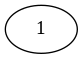

El valor Pn para n= 2  es de  1


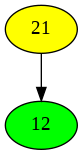

El valor Pn para n= 3  es de  3


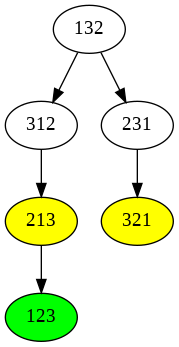

El valor Pn para n= 4  es de  4


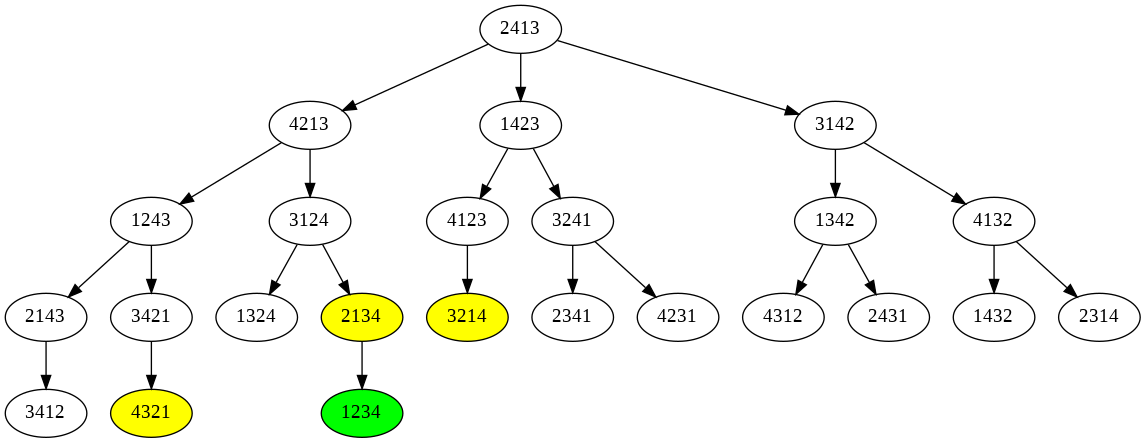

El valor Pn para n= 5  es de  5


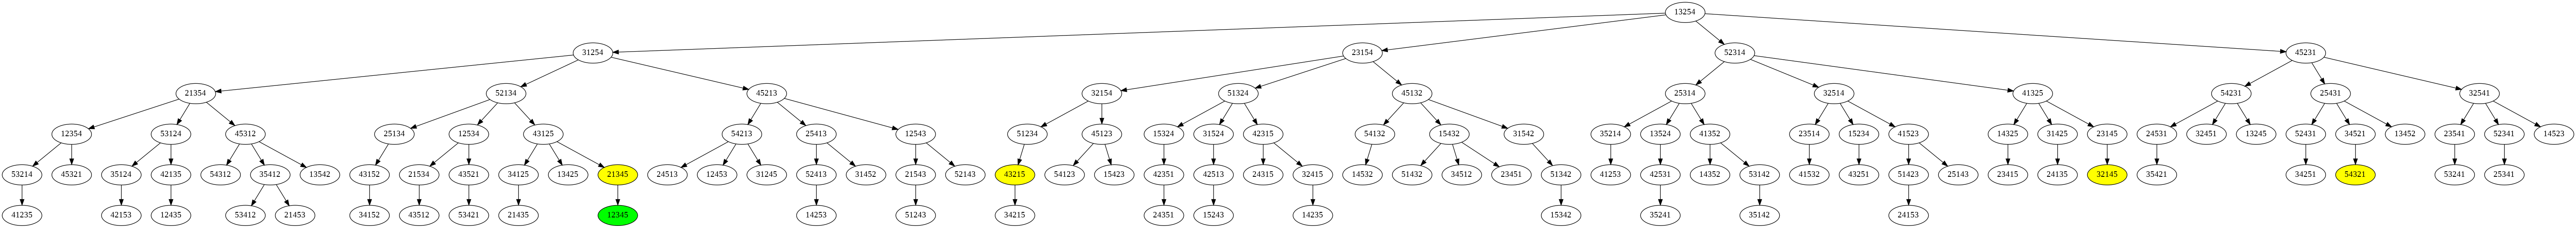

In [7]:
for j in range(1,6,1):
  valorpn, listapn = calculopn(j, True)
  print('El valor Pn para n=',j,' es de ', valorpn)
  pancakestree(listapn)

# 2.   Modifique el código de arbol de pancakes dejando solamente el código y estructuras de datos necesarias para calcular el $P_{n}$ y ejecute el código al menos una noche (8 horas) iniciando con $n=5$. ¿Cúal es el mayor valor de $P_{n}$ calculado?



In [8]:
stop=True
k=1
while (stop):
  valorpn = calculopn(k,False)
  print('El valor Pn para n=',k,' es de ', valorpn)
  k+=1

El valor Pn para n= 1  es de  0
El valor Pn para n= 2  es de  1
El valor Pn para n= 3  es de  3
El valor Pn para n= 4  es de  4
El valor Pn para n= 5  es de  5
El valor Pn para n= 6  es de  7


KeyboardInterrupt: ignored

# 3.   Modifique el código de arbol de pancakes para graficar los arboles de pancakes usando dos espátulas



In [9]:
def two_spatulas(s, L):  

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            
            for i in list(range(len(s) - 1)):
              first = list( range(len(s) - (i + 1) ) )#Flipping first part that spatula takes
              for j in first[::-1]: 
                second = s[j:len(s) - i] 
                d = s[0:j] + second[::-1] + s[len(s) - i : ] #Flipping second part that spatula takes.
                if(d == sorted(d)):
                     flag = True
              if flag:
                node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
              else: 
                node = pydot.Node(lstr(s))

              G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)) and (l < L):
              for i in list(range(len(s) - 1)):
                first = list(range(len(s) - (i + 1)))
                for j in first[::-1]:
                  second = s[j:len(s) - i]
                  d = s[0:j] + second[::-1] + s[len(s) - i :] 
                  if (d != s) and not(lstr(d) in visited.keys()):
                    if(d != sorted(d)):
                      node = pydot.Node(lstr(d))
                    else:
                      node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                      print("Pn: ", l + 1)

                    
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    queue.append([d,l+1]) 
                    visited[lstr(d)] = True 
                
        # Display the pydot graph G
        im = Image(G.create_png())
        display(im)

Pn:  2


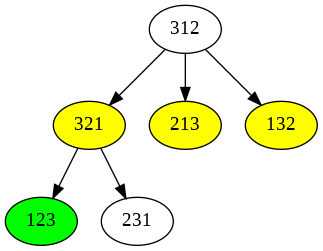

In [10]:
p = [3,1,2]
two_spatulas(p, 3)